In [4]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import pickle

In [5]:
data = pd.read_csv('dpadata.csv')
data.head()

,ROW,CORRIDOR_SEGMENT_ID,SPEED,VOLUME,OCCUPANCY,TRAFFIC_DENSITY,CALCULATED_TOLL
0,1,211,70.15000,426.00000,0.00000,6.09085,0.55
1,2,101,-1.00000,-1.00000,-1.00000,-1.00000,0.55
2,3,213,73.94812,199.50000,0.02031,2.69728,0.30
3,4,212,75.04696,269.21739,0.02217,3.58489,0.35
4,5,212,73.02500,225.60000,0.01650,3.08941,0.35


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72968 entries, 0 to 72967
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ROW                  72968 non-null  int64  
 1   CORRIDOR_SEGMENT_ID  72968 non-null  int64  
 2   SPEED                72968 non-null  float64
 3   VOLUME               72968 non-null  float64
 4   OCCUPANCY            72968 non-null  float64
 5   TRAFFIC_DENSITY      72968 non-null  float64
 6   CALCULATED_TOLL      72968 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 3.9 MB


In [7]:
data['CORRIDOR_SEGMENT_ID'] = data['CORRIDOR_SEGMENT_ID'].astype(float)

In [8]:
data.drop(columns='ROW', inplace=True)
data.head()

,CORRIDOR_SEGMENT_ID,SPEED,VOLUME,OCCUPANCY,TRAFFIC_DENSITY,CALCULATED_TOLL
0,211.0,70.15000,426.00000,0.00000,6.09085,0.55
1,101.0,-1.00000,-1.00000,-1.00000,-1.00000,0.55
2,213.0,73.94812,199.50000,0.02031,2.69728,0.30
3,212.0,75.04696,269.21739,0.02217,3.58489,0.35
4,212.0,73.02500,225.60000,0.01650,3.08941,0.35


In [9]:
data.isnull().sum()

CORRIDOR_SEGMENT_ID    0
SPEED                  0
VOLUME                 0
OCCUPANCY              0
TRAFFIC_DENSITY        0
CALCULATED_TOLL        0
dtype: int64

In [10]:
data.describe()

,CORRIDOR_SEGMENT_ID,SPEED,VOLUME,OCCUPANCY,TRAFFIC_DENSITY,CALCULATED_TOLL
count,72968.000000,72968.000000,72968.000000,72968.000000,72968.000000,72968.000000
mean,192.000000,52.245519,248.489903,-0.224305,3.320614,0.567552
std,37.432099,31.726777,266.011843,0.480475,4.310343,0.751416
min,101.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.300000
25%,201.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.300000
50%,204.000000,70.046150,186.666670,0.010000,2.596485,0.350000
75%,212.000000,72.595000,324.000000,0.017030,4.551505,0.550000
max,213.000000,83.800000,1903.200000,3.166670,65.286920,14.000000


In [11]:
data.shape

(72968, 6)

In [12]:
data.duplicated().sum()

np.int64(18977)

In [13]:
corr = data.corr()
corr

,CORRIDOR_SEGMENT_ID,SPEED,VOLUME,OCCUPANCY,TRAFFIC_DENSITY,CALCULATED_TOLL
CORRIDOR_SEGMENT_ID,1.000000,0.187283,0.147067,0.073550,0.162655,0.024686
SPEED,0.187283,1.000000,0.528120,0.952611,0.558124,0.077204
VOLUME,0.147067,0.528120,1.000000,0.577011,0.982157,0.719397
OCCUPANCY,0.073550,0.952611,0.577011,1.000000,0.617081,0.128642
TRAFFIC_DENSITY,0.162655,0.558124,0.982157,0.617081,1.000000,0.730467
CALCULATED_TOLL,0.024686,0.077204,0.719397,0.128642,0.730467,1.000000


<Axes: >

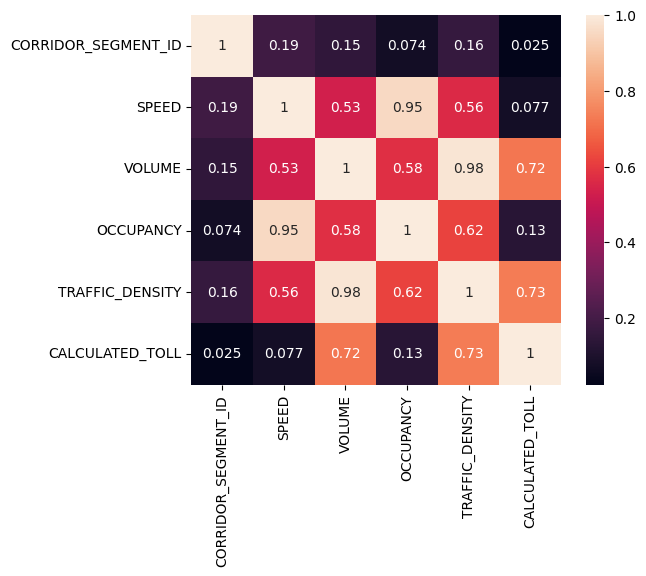

In [14]:
plt.Figure(figsize=(10,8))
sns.heatmap(corr,  square=True,annot=True)

In [15]:
data.replace(-1,0,inplace=True)
data.head()

,CORRIDOR_SEGMENT_ID,SPEED,VOLUME,OCCUPANCY,TRAFFIC_DENSITY,CALCULATED_TOLL
0,211.0,70.15000,426.00000,0.00000,6.09085,0.55
1,101.0,0.00000,0.00000,0.00000,0.00000,0.55
2,213.0,73.94812,199.50000,0.02031,2.69728,0.30
3,212.0,75.04696,269.21739,0.02217,3.58489,0.35
4,212.0,73.02500,225.60000,0.01650,3.08941,0.35


In [16]:
X = data.drop('CALCULATED_TOLL', axis=1)
y = data['CALCULATED_TOLL']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [17]:
models =[
    ('RandomForest', RandomForestRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('DecisionTree', DecisionTreeRegressor()),
    ('LinearRegression', LinearRegression())
]

In [18]:
for name,model in models:
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('predicted ', model.predict([[211,70.15,426,0,6.09085]]))
    print('Mean Square Error :', mean_squared_error(y_test, y_pred))
    print('R2 Square Error: ', r2_score(y_test, y_pred))
    print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
    filename = name + '.pk1'
    with open(filename, 'wb' ) as file :
        pickle.dump(model, file)

RandomForest


C:\Users\20813473\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


predicted  [0.558]
Mean Square Error : 0.015466394789496773
R2 Square Error:  0.972025319446235
Mean Absolute Error :  0.017023380111835924
KNN


C:\Users\20813473\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


predicted  [0.59]
Mean Square Error : 0.05085993312136827
R2 Square Error:  0.9080076254731101
Mean Absolute Error :  0.04702609363008442
DecisionTree
predicted  [0.55]
Mean Square Error : 0.028999972590724697
R2 Square Error:  0.9475466014973062
Mean Absolute Error :  0.019315316303057217
LinearRegression
predicted  [0.85332185]
Mean Square Error : 0.15804940511993026
R2 Square Error:  0.714129783952936
Mean Absolute Error :  0.21736968696345219


C:\Users\20813473\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\20813473\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
with open('RandomForest.pk1','rb') as file:
    newmodel = pickle.load(file)



In [20]:
output = newmodel.predict([[211,70.15,426,0,6.09085]])
output


C:\Users\20813473\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.558])

In [21]:
data.columns

Index(['CORRIDOR_SEGMENT_ID', 'SPEED', 'VOLUME', 'OCCUPANCY',
       'TRAFFIC_DENSITY', 'CALCULATED_TOLL'],
      dtype='object')